# Fraud Analysis and Detection
This a practice analysis code by Fajar Laksono.

## Import Libraries

In [1]:
import kagglehub
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

c:\Users\User\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and Transform datasets

### Download datasets

Data source by computingvictor from kaggle.
https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets

In [2]:
# Download latest version
path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\computingvictor\transactions-fraud-datasets\versions\1


### Load mcc_codes.json

In [3]:
# Load mcc_codes.json, and add columns
with open(os.path.join(path, "mcc_codes.json"), "r") as f: 
    mcc_code_json = json.load(f)

mcc_codes_df = pd.DataFrame(list(mcc_code_json.items()), columns=['id', 'name'])

### Load train_fraud_labels.json

In [4]:
# Load train_fraud_bales.json, and add columns

with open(os.path.join(path, "train_fraud_labels.json"), "r") as f: 
    train_fraud_labels_json = json.load(f)

train_fraud_labels_df = pd.DataFrame(list(train_fraud_labels_json["target"].items()), columns=['id', 'label'])

### Load transactions_data.csv

In [5]:
# Load transactions_data.csv, and add columns
transactions_df = pd.read_csv(os.path.join(path, "transactions_data.csv"))

### Load cards_data.csv

In [6]:
# Load cards_data.csv, and add columns
cards_df = pd.read_csv(os.path.join(path, "cards_data.csv"))

### Load users.csv

In [7]:
# Load users.csv, and add columns
users_df = pd.read_csv(os.path.join(path, "users_data.csv"))

## Data Preparation

### Dataset observations

#### Check Missing values

In [8]:
print("\n===> mcc_codes_df, missing values: \n", mcc_codes_df.isnull().sum())
print("\n===> train_fraud_labels_df, missing values: \n", train_fraud_labels_df.isnull().sum())
print("\n===> transactions_df, missing values: \n", transactions_df.isnull().sum())
print("\n===> cards_df, missing values: \n", cards_df.isnull().sum())
print("\n===> users_df, missing values: \n", users_df.isnull().sum())


===> mcc_codes_df, missing values: 
 id      0
name    0
dtype: int64

===> train_fraud_labels_df, missing values: 
 id       0
label    0
dtype: int64

===> transactions_df, missing values: 
 id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

===> cards_df, missing values: 
 id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

===> users_df, missing values: 
 id                   0
current_age   

#### Check datasets information

In [9]:
print(mcc_codes_df.info(), "\n")
print(train_fraud_labels_df.info(), "\n")
print(transactions_df.info(), "\n")
print(cards_df.info(), "\n")
print(users_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      109 non-null    object
 1   name    109 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   label   object
dtypes: object(2)
memory usage: 136.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 

#### Check Duplication

In [10]:
print(mcc_codes_df.duplicated(), "\n")
print(train_fraud_labels_df.duplicated(), "\n")
print(transactions_df.duplicated(), "\n")
print(cards_df.duplicated(), "\n")
print(users_df.duplicated(), "\n")

0      False
1      False
2      False
3      False
4      False
       ...  
104    False
105    False
106    False
107    False
108    False
Length: 109, dtype: bool 

0          False
1          False
2          False
3          False
4          False
           ...  
8914958    False
8914959    False
8914960    False
8914961    False
8914962    False
Length: 8914963, dtype: bool 

0           False
1           False
2           False
3           False
4           False
            ...  
13305910    False
13305911    False
13305912    False
13305913    False
13305914    False
Length: 13305915, dtype: bool 

0       False
1       False
2       False
3       False
4       False
        ...  
6141    False
6142    False
6143    False
6144    False
6145    False
Length: 6146, dtype: bool 

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool 



### Data type correction

#### mcc_codes

In [11]:
mcc_codes_df['id'] = pd.to_numeric(mcc_codes_df['id'])
mcc_codes_df['name'] = mcc_codes_df['name'].astype("string")

#### train_fraud_labels

In [12]:
train_fraud_labels_df['id'] = pd.to_numeric(train_fraud_labels_df['id'])
train_fraud_labels_df['label'] = train_fraud_labels_df['label'].astype("string")

#### transactions

In [13]:
transactions_df['amount'] = transactions_df['amount'].astype("string")
transactions_df['use_chip'] = transactions_df['use_chip'].astype("string")
transactions_df['merchant_city'] = transactions_df['merchant_city'].astype("string")
transactions_df['merchant_state'] = transactions_df['merchant_state'].astype("string")
transactions_df['errors'] = transactions_df['errors'].astype("string")

#### cards

In [14]:
cards_df['card_brand'] = cards_df['card_brand'].astype("string")
cards_df['card_type'] = cards_df['card_type'].astype("string")
# cards_df['expires'] = pd.to_datetime(cards_df['card_number'])
cards_df['has_chip'] = cards_df['has_chip'].astype("string")
cards_df['credit_limit'] = cards_df['credit_limit'].astype("string")
cards_df['card_on_dark_web'] = cards_df['card_on_dark_web'].astype("string")

#### users

In [15]:
users_df['gender'] = users_df['gender'].astype("string")
users_df['address'] = users_df['address'].astype("string")
users_df['per_capita_income'] = users_df['per_capita_income'].astype("string")
users_df['yearly_income'] = users_df['yearly_income'].astype("string")
users_df['total_debt'] = users_df['total_debt'].astype("string")

### Mergin Datasets

In [16]:
data = transactions_df.merge(cards_df, left_on="card_id", right_on="id", how="left", suffixes=("", "_cards_data"))
data = data.merge(users_df, left_on="client_id", right_on="id", how="left", suffixes=("", "_users_data"))
data = data.merge(mcc_codes_df, left_on="mcc", right_on="id", how="left", suffixes=("", "_mcc_codes"))
data = data.merge(train_fraud_labels_df, left_on="id", right_on="id", how="left", suffixes=("", "_fraud_labels"))

# data["amount_relative_to_limit"] = data['amount'] / data['credit_limit']
# data["amount_relative_to_yearly_salary"] = data['amount'] / data ["yearly_income"]

### Value Correction

#### Modification

In [17]:
data['date'] = pd.to_datetime(data['date']).astype(int) // 10**9
data['amount'] = data['amount'].str.extract(r'(-?\d+)').astype(int)
data['expires'] = pd.to_datetime(data['expires']).astype(int) // 10**9
data['acct_open_date'] = pd.to_datetime(data['acct_open_date']).astype(int) // 10**9
data['credit_limit'] = data['credit_limit'].str.extract(r'(-?\d+)').astype(int)
data['per_capita_income'] = data['per_capita_income'].str.extract(r'(-?\d+)').astype(int)
data['yearly_income'] = data['yearly_income'].str.extract(r'(-?\d+)').astype(int)
data['total_debt'] = data['total_debt'].str.extract(r'(-?\d+)').astype(int)

label_encoder = LabelEncoder()
categorical_cols = ['use_chip', 'errors', 'card_brand',
                    'card_type', 'has_chip', 'gender', 'label']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

C:\Users\User\AppData\Local\Temp\ipykernel_14428\696328010.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['expires'] = pd.to_datetime(data['expires']).astype(int) // 10**9
C:\Users\User\AppData\Local\Temp\ipykernel_14428\696328010.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['acct_open_date'] = pd.to_datetime(data['acct_open_date']).astype(int) // 10**9


> <b><u>Note :</u></b>
> 
> The label will be encoded. 0 = Null, 1 = Legit/No, 2 - Fraudulant/Yes 

#### Removing

In [18]:
data = data.drop(columns=['card_on_dark_web', 'address', 'zip', 'name', 'merchant_city', 'merchant_state'])

## Analysis

### structure

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   date                   int64  
 2   client_id              int64  
 3   card_id                int64  
 4   amount                 int64  
 5   use_chip               int64  
 6   merchant_id            int64  
 7   mcc                    int64  
 8   errors                 int64  
 9   id_cards_data          int64  
 10  client_id_cards_data   int64  
 11  card_brand             int64  
 12  card_type              int64  
 13  card_number            int64  
 14  expires                int64  
 15  cvv                    int64  
 16  has_chip               int64  
 17  num_cards_issued       int64  
 18  credit_limit           int64  
 19  acct_open_date         int64  
 20  year_pin_last_changed  int64  
 21  id_users_data          int64  
 22  current_age     

### distribution

label
1    8901631
0    4390952
2      13332
Name: count, dtype: int64


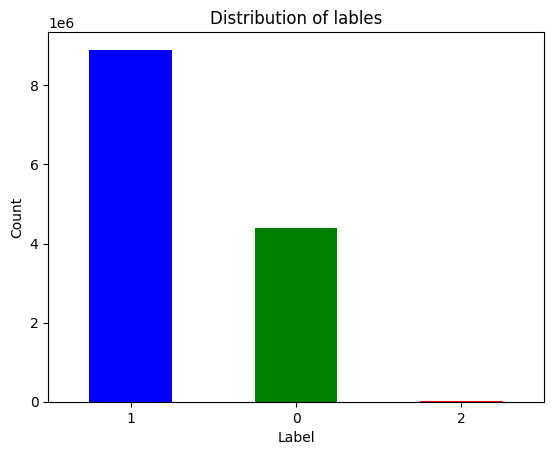

In [20]:
distribution = data["label"].value_counts(dropna=False)
print(distribution)
distribution.plot(kind="bar", color=["blue", "green", "red"])
plt.ion()
plt.title("Distribution of lables")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

> <u><b>Note:</b></u> 
> 
> NA: something we need to predict
> 
> Yes: Fraudulent transaction
> 
> No: Legit transaction
> 

## Training Model

### Data preparation

#### Seperating Fraud and Legit transaction

In [21]:
fraud_trans_records = data[data.label == 2]
legit_trans_records = data[data.label == 1]

#### Analysis

In [22]:
print(fraud_trans_records.shape)
print(legit_trans_records.shape)

(13332, 36)
(8901631, 36)


In [23]:
print("=> fraud_trans_records_amount \n", fraud_trans_records.amount.describe())
print("=> normal_trans_records_amount \n", legit_trans_records.amount.describe())
print("\n")
print("=> fraud_trans_records_credit_limit \n", fraud_trans_records.credit_limit.describe())
print("=> normal_trans_records_credit_limit \n", legit_trans_records.credit_limit.describe())
print("\n")
print("=> fraud_trans_records_yearly_income \n", fraud_trans_records.yearly_income.describe())
print("=> normal_trans_records_yearly_income \n", legit_trans_records.yearly_income.describe())

=> fraud_trans_records_amount 
 count    13332.000000
mean       109.785179
std        213.717208
min       -500.000000
25%         17.000000
50%         69.500000
75%        148.000000
max       4978.000000
Name: amount, dtype: float64
=> normal_trans_records_amount 
 count    8.901631e+06
mean     4.242688e+01
std      8.111167e+01
min     -5.000000e+02
25%      8.000000e+00
50%      2.800000e+01
75%      6.300000e+01
max      6.613000e+03
Name: amount, dtype: float64


=> fraud_trans_records_credit_limit 
 count     13332.000000
mean      13757.910441
std       11035.564361
min           0.000000
25%        6600.000000
50%       12346.000000
75%       19100.750000
max      132439.000000
Name: credit_limit, dtype: float64
=> normal_trans_records_credit_limit 
 count    8.901631e+06
mean     1.555227e+04
std      1.218343e+04
min      0.000000e+00
25%      8.100000e+03
50%      1.346000e+04
75%      2.083900e+04
max      1.413910e+05
Name: credit_limit, dtype: float64


=> fraud_trans

In [24]:
data[['date', 'amount', 'credit_limit', 'yearly_income', 'label']].groupby('label').mean()

,date,amount,credit_limit,yearly_income
label,,,,
0,1.420499e+09,42.608256,15550.340328,46668.140251
1,1.420539e+09,42.426883,15552.269101,46694.792739
2,1.421920e+09,109.785179,13757.910441,44390.120237


> <u><b>Note:</b></u>
> 
> The data is imbalance or under-sampling. it is required to make them equal during the training.
> 
> The lowest data belongs to faudulant transaction (13332 records), we need to take equal number from the legit transaction, and merge it as one.

#### Equalization

In [25]:
sample_legit_transactions = legit_trans_records.sample(n=13332)
sample_data = pd.concat([fraud_trans_records, sample_legit_transactions], axis=0)

print(sample_data['label'].value_counts())

label
2    13332
1    13332
Name: count, dtype: int64


In [26]:
sample_data[['date', 'amount', 'credit_limit', 'yearly_income', 'label']].groupby('label').mean()

,date,amount,credit_limit,yearly_income
label,,,,
1,1.420871e+09,42.675443,15585.974047,46791.457921
2,1.421920e+09,109.785179,13757.910441,44390.120237


> <b><u>Note:</u></b>
> 
> Alhough, the data is distributed equally, the mean of the labels remains the same.

### Build Feature and Target

In [27]:
Y = sample_data['label']
X = sample_data.drop(columns=['label'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [28]:
print("\nX \t: ", X)
print("\nX_train \t: ", X_train)
print("\nX_test \t: ", X_test)
print("\n")
print("\nY \t: ", Y)
print("\nY_train \t: ", Y_train)
print("\nY_test \t: ", Y_test)


X 	:                  id        date  client_id  card_id  amount  use_chip  \
3459       7479444  1262390160        126     5497       0         1   
9526       7486725  1262552280        126     5497     339         1   
12989      7490901  1262647800        720     4136       4         1   
13000      7490914  1262648880        720     4136       7         1   
13081      7491008  1262658840       1644     3444       8         1   
...            ...         ...        ...      ...     ...       ...   
3797203   12079588  1355669040       1981     2108      14         2   
1087875    8780890  1290019500       1407     4695      64         2   
819994     8457760  1283329860          4     4201      94         2   
11464199  21483938  1530881700       1116      301     132         0   
8971053   18414307  1474624680        368     3822      42         1   

          merchant_id   mcc  errors  id_cards_data  ...  birth_month  gender  \
3459            90999  4722       0           54

### Training Model

> <b><u>Note</u></b>
> 
> Use RandomForest for a complex, non-linear problems with high-dimensional or categorical data.


#### Random Forest

In [29]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

#### Predict

In [30]:
Y_train_prediction = model.predict(X_train)

#### Evaluate Model Accuracy

In [31]:
print(classification_report(Y_train, Y_train_prediction))
print("\nAccuracy Store \t: ", accuracy_score(Y_train_prediction, Y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10665
           2       1.00      1.00      1.00     10666

    accuracy                           1.00     21331
   macro avg       1.00      1.00      1.00     21331
weighted avg       1.00      1.00      1.00     21331


Accuracy Store 	:  1.0


## Testing Model

### Predict

In [32]:
Y_test_prediction = model.predict(X_test)

### Evaluate Model Accuracy

In [33]:
print(classification_report(Y_test, Y_test_prediction))
print(accuracy_score(Y_test_prediction, Y_test))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93      2667
           2       0.94      0.92      0.93      2666

    accuracy                           0.93      5333
   macro avg       0.93      0.93      0.93      5333
weighted avg       0.93      0.93      0.93      5333

0.930245640352522


## Explain Prediction Behaviour

### Feature Importance

In [34]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Important features:")
print(feature_importance_df.head(10))


Top 10 Important features:
              Feature  Importance
5            use_chip    0.206532
34       id_mcc_codes    0.096434
7                 mcc    0.091488
4              amount    0.081696
1                date    0.072759
0                  id    0.071325
6         merchant_id    0.051019
18       credit_limit    0.018966
29  per_capita_income    0.017060
19     acct_open_date    0.016497


## Predict Unlabelled Transactions

### Prepare Data

In [35]:
predict_transaction_data = data.drop(["label"], axis=1)

### Predict

In [36]:
predict_transaction_data["label"] = model.predict(predict_transaction_data)

### Analyze result

In [37]:
result_distribution_count = predict_transaction_data["label"].value_counts(dropna=False)
print(result_distribution_count)

label
1    12521978
2      783937
Name: count, dtype: int64


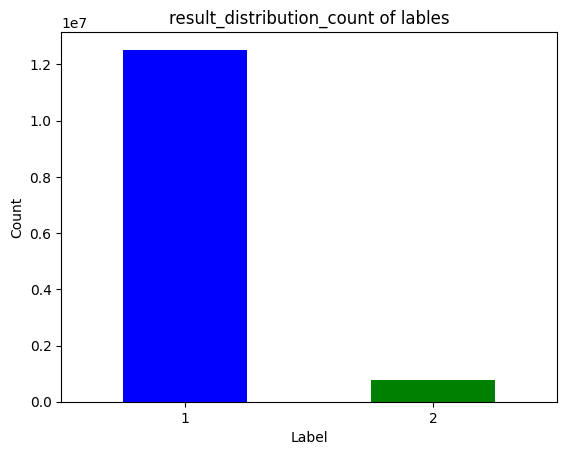

In [38]:
result_distribution_count.plot(kind="bar", color=["blue", "green", "red"])
plt.ion()
plt.title("result_distribution_count of lables")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## Exporting Prediction Result as CSV

In [39]:
result_fraud_detection = predict_transaction_data[['id', 'label']]
predict_transaction_data['label'] = result_fraud_detection['label'].replace({1: 'No', 2: 'Yes'}).astype(str)
result_fraud_detection.to_csv("fraud_prediction_result.csv", index=False)